<h1><center>Preview Suicide Data in MIMICIII</center></h1>

### Introduction
This project is to extract and preview the suicide data from MIMICIII database. The suicide data is indicated by the ICD9 codes. The most complete codes should be in the table DIAGNOSES_ICD.

According to Find-A-Code.com (https://www.findacode.com), the suicide related ICD-9 codes are (including suicidal ideation):

| Code(s)         | Description                                                                       |
|-----------------|-----------------------------------------------------------------------------------|
| E950.0 ‑ E950.9 | E950 Suicide and self-inflicted poisoning by solid or liquid substances           |
| E951.0 ‑ E951.8 | E951 Suicide and self-inflicted poisoning by gases in domestic use                |
| E952.0 ‑ E952.9 | E952 Suicide and self-inflicted poisoning by other gases and vapors               |
| E953.0 ‑ E953.9 | E953 Suicide and self-inflicted injury by hanging, strangulation, and suffocation |
| E954 ‑ E954     | E954 Suicide and self-inflicted injury by submersion [drowning]                   |
| E955.0 ‑ E955.9 | E955 Suicide and self-inflicted injury by firearms, air guns and explosives       |
| E956 ‑ E956     | E956 Suicide and self-inflicted injury by cutting and piercing instrument         |
| E957.0 ‑ E957.9 | E957 Suicide and self-inflicted injuries by jumping from high place               |
| E958.0 ‑ E958.9 | E958 Suicide and self-inflicted injury by other and unspecified means             |
| E959 ‑ E959     | E959 Late effects of self-inflicted injury                                        |
| V62.84          | Suicidal ideation                                                                 |

### Extract Suicide Data 
The suicide data is extracted from DIAGNOSES_ICD.csv based on its column "ICD9_CODE".

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import dateutil
import datetime as dt
import numpy as np
import math
import seaborn as sns

In [3]:
diagnoses_ICD = pd.read_csv("DIAGNOSES_ICD.csv", header=0, sep=",")

In [4]:
#print(diagnoses_ICD.head(100))

In [5]:
diagnoses_ICD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
ROW_ID        651047 non-null int64
SUBJECT_ID    651047 non-null int64
HADM_ID       651047 non-null int64
SEQ_NUM       651000 non-null float64
ICD9_CODE     651000 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB


In [6]:
is_suicide = diagnoses_ICD["ICD9_CODE"].str.contains("V6284|E95", na=False)

In [7]:
sui_diagnoses_ICD = diagnoses_ICD[is_suicide]

In [8]:
print(sui_diagnoses_ICD.head())

      ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
102     1562         119   135738      7.0      E956
350      579          71   111944      4.0     E9503
760      153          22   165315      3.0     E9502
761      154          22   165315      4.0     E9503
2036    3572         303   103013      7.0     E9500


In [9]:
suicide_ICD_list = list(sui_diagnoses_ICD["ICD9_CODE"])

In [10]:
print(len(suicide_ICD_list))

877


There are 877 suicide related ICD codes, including suicidal ideation.
Save the suicide related ICD codes to local storage with filename "suicide_ICD.txt"

In [11]:
with open("suicide_ICD.txt", "w") as f:
    for code in suicide_ICD_list:
        f.write(code +"\n")

### Data Visualization

#### Visualize the number of suicide records and non-suicide records.

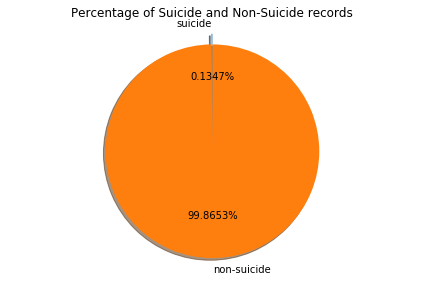

In [12]:
labels = ["suicide", "non-suicide"]
sizes = [len(sui_diagnoses_ICD.index), len(diagnoses_ICD.index)-len(sui_diagnoses_ICD.index)]
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%.4f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.title("Percentage of Suicide and Non-Suicide records")
plt.tight_layout()
plt.show()

The suicide data only takes 0.1347% of the whole data set.

#### Visualize the categories of the suicide ICD-9 codes.

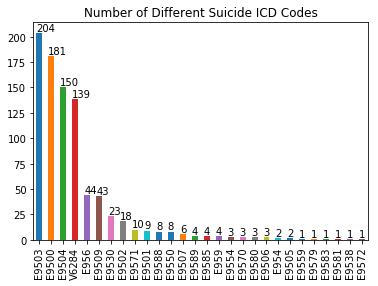

In [13]:
ax = sui_diagnoses_ICD['ICD9_CODE'].value_counts().plot(kind="bar", title="Number of Different Suicide ICD Codes")
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+2,str(i.get_height()))

The top four ICD-9 codes are: E9503, E9500, E9504 and V6284
1. E9503: Poison-psychotropic agt
2. E9500: Poison-analgesics
3. E9504: Poison-drug/medicin NEC
4. V6284: Suicidal ideation

Parse the ICD9 codes and extract the upper category, i.e. "E950" is the upper category of "E9503", and store the value in a new column "Upper_Category".

In [14]:
sui_diagnoses_ICD["Upper_Category"]=sui_diagnoses_ICD["ICD9_CODE"].str.slice().str[0:4]

/home/cs52205/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
print(sui_diagnoses_ICD.head())

      ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE Upper_Category
102     1562         119   135738      7.0      E956           E956
350      579          71   111944      4.0     E9503           E950
760      153          22   165315      3.0     E9502           E950
761      154          22   165315      4.0     E9503           E950
2036    3572         303   103013      7.0     E9500           E950


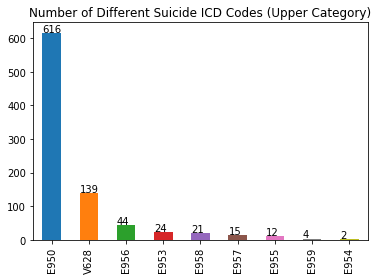

In [16]:
ax2 = sui_diagnoses_ICD['Upper_Category'].value_counts().plot(kind="bar", 
                                                              title="Number of Different Suicide ICD Codes (Upper Category)")
for i in ax2.patches:
    ax2.text(i.get_x(), i.get_height()+2.5,str(i.get_height()))

(-1.1377109276637962,
 1.520832623735541,
 -1.1145146727161235,
 1.1132812249847497)

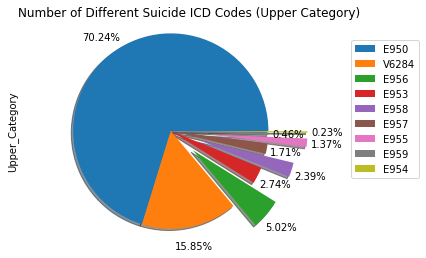

In [17]:
explode = (0.0, 0.0, 0.3, 0.0, 0.3, 0.0, 0.4, 0.0, 0.4)
ax3 = sui_diagnoses_ICD['Upper_Category'].value_counts().plot(kind="pie", labels=None,autopct='%1.2f%%', pctdistance=1.2, 
                                                              labeldistance=1.05,explode=explode,shadow=True,
                                                             title="Number of Different Suicide ICD Codes (Upper Category)")
labels = ["E950", "V6284","E956", "E953", "E958", "E957", "E955", "E959", "E954"]
ax3.legend(labels,loc="right", bbox_to_anchor=(1.2, 0.6))
plt.axis("equal")


The top 3 suicide ICD codes are:

1. E950: Suicide and self-inflicted poisoning by solid or liquid substances
2. V6284: Suicidal ideation
3. E953: Suicide and self-inflicted injury by hanging, strangulation, and suffocation

__The results shows that most of the suicide attempts are by poisoning.__

### Extact Suicide Data from PATIENTS Table

The DIAGONSES_ICD table are connected to the tables PATIENTS AND ADMISSIONS by the foreign key SUBJECT_ID. So extract the SUBJECT_ID is needed.
__SUBJECT_ID is a unique identifier which specifies an individual patient. It is a candidate key for the table, so is unique for each row.__

In [18]:
suicide_subject_ID = list(sui_diagnoses_ICD["SUBJECT_ID"])

In [19]:
len(suicide_subject_ID)

877

In [20]:
len(set(suicide_subject_ID))

596

From the suicide_subject_ID list, there should be 596 patients that have suicide attempts or suicidal ideation.

In [21]:
with open("suicide_subject_ID.txt", "w") as f:
    for ID in suicide_subject_ID:
        f.write(str(ID) +"\n")

In [22]:
patients = pd.read_csv("PATIENTS.csv", header=0, sep=",")

In [23]:
print(patients.head())

   ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
0     234         249      F  2075-03-13 00:00:00                  NaN   
1     235         250      F  2164-12-27 00:00:00  2188-11-22 00:00:00   
2     236         251      M  2090-03-15 00:00:00                  NaN   
3     237         252      M  2078-03-06 00:00:00                  NaN   
4     238         253      F  2089-11-26 00:00:00                  NaN   

              DOD_HOSP DOD_SSN  EXPIRE_FLAG  
0                  NaN     NaN            0  
1  2188-11-22 00:00:00     NaN            1  
2                  NaN     NaN            0  
3                  NaN     NaN            0  
4                  NaN     NaN            0  


In [24]:
sui_patients = patients[patients["SUBJECT_ID"].isin(suicide_subject_ID)]

In [25]:
#sui_patients.head(100)

In [26]:
sui_patients.shape

(596, 8)

The number of patients that have suicide attempts or suicidal ideation is 596.

#### Visualize the distribution by gender.

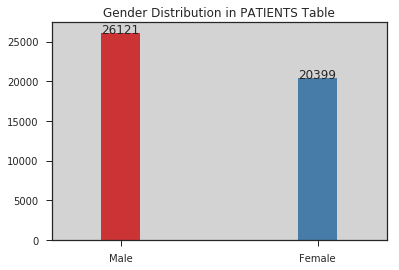

In [78]:
ax5 = patients["GENDER"].value_counts().plot(kind="bar", title="Gender Distribution in PATIENTS Table", width=0.2)
for i in ax5.patches:
    ax5.text(i.get_x(), i.get_height()+3,str(i.get_height()))
ax5.set_xticklabels(["Male", "Female"],rotation="horizontal")
ax5.set_facecolor('lightgrey')

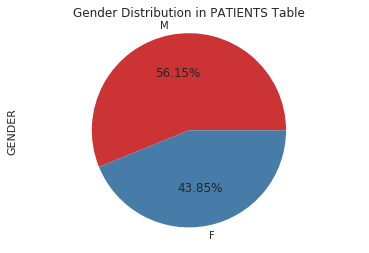

In [84]:
patients["GENDER"].value_counts().plot(kind="pie", title="Gender Distribution in PATIENTS Table", autopct='%1.2f%%')
plt.axis("equal")
plt.show()

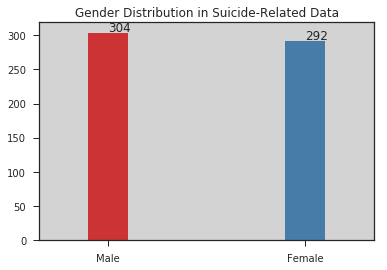

In [83]:
ax4 = sui_patients["GENDER"].value_counts().plot(kind="bar", title="Gender Distribution in Suicide-Related Data", width=0.2)
for i in ax4.patches:
    ax4.text(i.get_x()+0.1, i.get_height()+2.5,str(i.get_height()))
ax4.set_xticklabels(["Male", "Female"],rotation="horizontal")
ax4.set_facecolor('lightgrey')

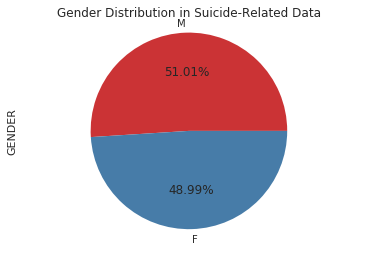

In [82]:
sui_patients["GENDER"].value_counts().plot(kind="pie", title="Gender Distribution in Suicide-Related Data", autopct='%1.2f%%')
plt.axis("equal")
plt.show()

The number of male patients is slightly greater than female, probably because there are more male patients in the whole data set.

#### Visualize distribution by age.

DOB is the date of birth of the given patient. Patients who are older than 89 years old at any time in the database have had their date of birth shifted to obscure their age and comply with HIPAA. The shift process was as follows: the patient’s age at their first admission was determined. The date of birth was then set to exactly 300 years before their first admission.

Calculate the age and add to the table, which needs the admissions table.

In [28]:
admissions = pd.read_csv("ADMISSIONS.csv", sep=",", header=0)

In [29]:
print(admissions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
ROW_ID                  58976 non-null int64
SUBJECT_ID              58976 non-null int64
HADM_ID                 58976 non-null int64
ADMITTIME               58976 non-null object
DISCHTIME               58976 non-null object
DEATHTIME               5854 non-null object
ADMISSION_TYPE          58976 non-null object
ADMISSION_LOCATION      58976 non-null object
DISCHARGE_LOCATION      58976 non-null object
INSURANCE               58976 non-null object
LANGUAGE                33644 non-null object
RELIGION                58518 non-null object
MARITAL_STATUS          48848 non-null object
ETHNICITY               58976 non-null object
EDREGTIME               30877 non-null object
EDOUTTIME               30877 non-null object
DIAGNOSIS               58951 non-null object
HOSPITAL_EXPIRE_FLAG    58976 non-null int64
HAS_CHARTEVENTS_DATA    58976 non-null int64
dtypes: int64(5), objec

In [30]:
# Convert date from string to date times
admissions['ADMITTIME'] = admissions['ADMITTIME'].apply(dateutil.parser.parse, dayfirst=True)

In [31]:
min_admittime = admissions.groupby("SUBJECT_ID")[['ADMITTIME']].min().reset_index()

In [32]:
type(min_admittime)

pandas.core.frame.DataFrame

In [33]:
min_admittime.head()

,SUBJECT_ID,ADMITTIME
0,2,2138-07-17 19:04:00
1,3,2101-10-20 19:08:00
2,4,2191-03-16 00:28:00
3,5,2103-02-02 04:31:00
4,6,2175-05-30 07:15:00


In [34]:
min_admittime.shape

(46520, 2)

In [35]:
patients_copy = patients.copy()

In [36]:
patients_copy.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [37]:
patients_copy_sorted = patients_copy.sort_values(by="SUBJECT_ID")

In [38]:
print(patients_copy_sorted.head())

     ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
222       1           2      M  2138-07-17 00:00:00                  NaN   
223       2           3      M  2025-04-11 00:00:00  2102-06-14 00:00:00   
224       3           4      F  2143-05-12 00:00:00                  NaN   
225       4           5      M  2103-02-02 00:00:00                  NaN   
226       5           6      F  2109-06-21 00:00:00                  NaN   

    DOD_HOSP              DOD_SSN  EXPIRE_FLAG  
222      NaN                  NaN            0  
223      NaN  2102-06-14 00:00:00            1  
224      NaN                  NaN            0  
225      NaN                  NaN            0  
226      NaN                  NaN            0  


In [39]:
patients_copy_sorted.shape

(46520, 8)

In [40]:
patients_age = patients_copy_sorted.merge(min_admittime, how="inner")

In [41]:
patients_age.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME
0,1,2,M,2138-07-17 00:00:00,NaN,NaN,NaN,0,2138-07-17 19:04:00
1,2,3,M,2025-04-11 00:00:00,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1,2101-10-20 19:08:00
2,3,4,F,2143-05-12 00:00:00,NaN,NaN,NaN,0,2191-03-16 00:28:00
3,4,5,M,2103-02-02 00:00:00,NaN,NaN,NaN,0,2103-02-02 04:31:00
4,5,6,F,2109-06-21 00:00:00,NaN,NaN,NaN,0,2175-05-30 07:15:00


Create a new column "AGE" which is the difference between DOB and ADMITTIME.

In [42]:
patients_age["DOB"] = patients_age['DOB'].apply(dateutil.parser.parse, dayfirst=True)

In [43]:
patients_age["AGE"] = np.floor(((patients_age["ADMITTIME"]-patients_age["DOB"])/365/np.timedelta64(1, 'D'))).astype(int)

In [44]:
patients_age.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME,AGE
0,1,2,M,2138-07-17,NaN,NaN,NaN,0,2138-07-17 19:04:00,0
1,2,3,M,2025-11-04,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1,2101-10-20 19:08:00,76
2,3,4,F,2143-12-05,NaN,NaN,NaN,0,2191-03-16 00:28:00,47
3,4,5,M,2103-02-02,NaN,NaN,NaN,0,2103-02-02 04:31:00,0
4,5,6,F,2109-06-21,NaN,NaN,NaN,0,2175-05-30 07:15:00,65


In [45]:
patients_age[patients_age["AGE"] > 89]

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME,AGE


The patients older than 89 at their first admission have their ages protected. So for these group, ages are all set to be 90.

In [46]:
older89 = list(patients_age[patients_age["AGE"] < 0].index)

In [47]:
patients_age.loc[older89, "AGE"] = 90

In [48]:
patients_age[patients_age["AGE"] <0]

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME,AGE


In [49]:
patients_age.loc[older89, :].head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ADMITTIME,AGE
15,16,19,M,1808-05-08 00:00:00,2109-08-18 00:00:00,NaN,2109-08-18 00:00:00,1,2108-05-08 16:25:00,90
25,26,30,M,1872-10-14 00:00:00,NaN,NaN,NaN,0,2172-10-14 14:17:00,90
29,30,34,M,1886-07-18 00:00:00,2192-01-30 00:00:00,NaN,2192-01-30 00:00:00,1,2186-07-18 16:46:00,90
48,49,56,F,1804-02-01 00:00:00,2104-01-08 00:00:00,2104-01-08 00:00:00,2104-01-08 00:00:00,1,2104-02-01 02:01:00,90
102,103,112,M,1894-06-13 00:00:00,2196-09-29 00:00:00,2196-09-29 00:00:00,2196-09-29 00:00:00,1,2194-06-13 18:39:00,90


Now the ages are found. Those older than 89 are marked with age 90.

Save the patient_age to local directory in a csv file named "PATIENT_WITH_AGE.csv".

In [50]:
patients_age.to_csv("PATIENT_WITH_AGE.csv")

__Examine the age distribution in the PATIENTS table.__

/home/cs52205/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


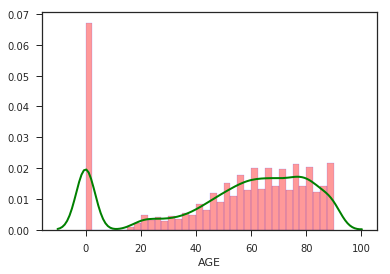

In [73]:
sns.distplot(patients_age['AGE'], hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':"blue"},
             kde_kws={'linewidth': 2, "color":"green"})

In the PATIENTS tables, the peak age is 0. From age 15 to age 89, the number increases as the age increases. Besides age 0, the highest desity age group is above 60.

__Visualize the age distribution in the suicide-related data.__

In [85]:
sui_patients_age = patients_age[patients_age["SUBJECT_ID"].isin(suicide_subject_ID)]

In [86]:
sui_patients_age.shape

(596, 10)

/home/cs52205/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


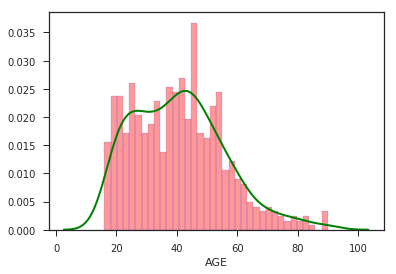

In [87]:
sns.distplot(sui_patients_age['AGE'], hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':"blue"},
             kde_kws={'linewidth': 2, "color":"green"})

/home/cs52205/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/cs52205/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


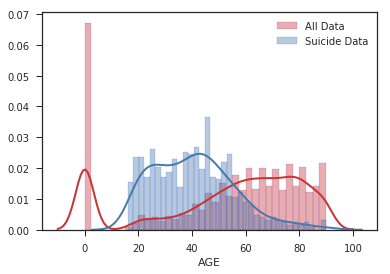

In [113]:
x = patients_age["AGE"]
y = sui_patients_age["AGE"]
fig, ax = plt.subplots()
for a in [x, y]:
    if a is x:
        sns.distplot(a, hist=True, kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':"blue"},
             kde_kws={'linewidth': 2}, label="All Data")
    else:
        sns.distplot(a, hist=True, kde=True, 
             bins=int(180/5), 
             hist_kws={'edgecolor':"blue"},
             kde_kws={'linewidth': 2}, label="Suicide Data")
ax.legend()
plt.show()

The peak age among the suicide records is around age 45. The high desity age group ranges from about 18 to 54. After 54, the desity drops dramatically. The age distribution of the whole data set is focus on age 60 or older. That makes the suicide rate among age group ranged from 18 to 54 even higher.